In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression

## Play with random data


intercept: [-0.90269788]
coef: [[1.98613231]]


/home/otoomet/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


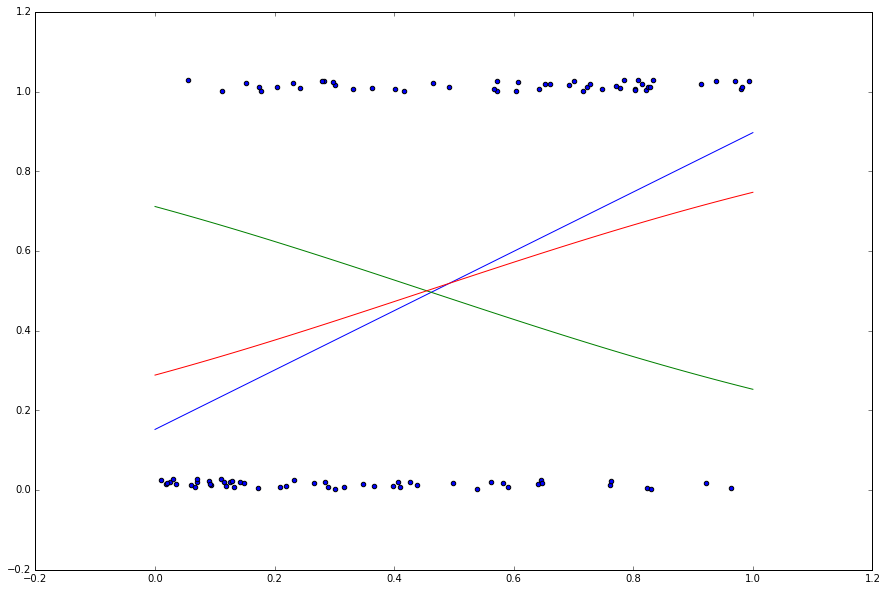

In [108]:
n = 100
x = np.random.uniform(size=(n,1))
beta = 3
yX = beta*x + np.random.logistic(size=(n,1))
y = (yX > beta/2) + 0
# plot (add random noise to avoid overplotting)
plt.figure(figsize=(15,10))
plt.scatter(x, y + np.random.uniform(0,0.03, size=(n,1)))
xs = np.linspace(0, 1, 100).reshape((100,1))
# grid to be predicted on

## linear model
ml = LinearRegression().fit(x, y)
haty = ml.predict(xs)
plt.plot(xs, haty)

## logistic model
mlog = LogisticRegression().fit(x, y)
hatyLog = mlog.predict_proba(xs)
plt.plot(xs, hatyLog)
print('intercept:', mlog.intercept_)
print('coef:', mlog.coef_)


## ROC curve

Set the y=1/y=0 threshold at different level
Compare logistic/linear regression

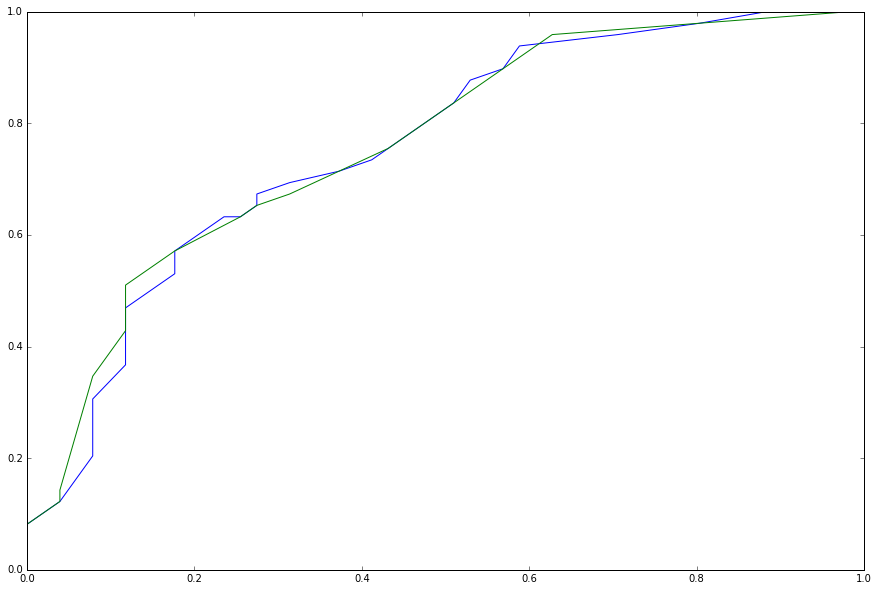

In [113]:
## linear
nt = 30
plt.figure(figsize=(15,10))
tp = np.empty((nt,1))
fp = np.empty_like(tp)
tpLog = np.empty_like(tp)
fpLog = np.empty_like(tp)
haty = ml.predict(x)
hatyLog = mlog.predict_proba(x)[:,1].reshape((n,1))
for i, threshold in enumerate(np.linspace(0.1, 0.9, nt)):
    tp[i] = np.sum(np.logical_and(y == 1, haty > threshold))/np.sum(y)
    fp[i] = np.sum(np.logical_and(y == 0, haty > threshold))/np.sum(y == 0)
    tpLog[i] = np.sum(np.logical_and(y == 1, hatyLog > threshold))/np.sum(y)
    fpLog[i] = np.sum(np.logical_and(y == 0, hatyLog > threshold))/np.sum(y == 0)
plt.plot(fp, tp)
plt.plot(fpLog, tpLog)    


In [23]:
df = pd.read_table('../data/hearth_catheterization.csv.bz2')
print(df.columns)
print(np.unique(df.race))
print(np.unique(df.death))

Index(['cat1', 'cat2', 'ca', 'sadmdte', 'dschdte', 'dthdte', 'lstctdte',
       'death', 'cardiohx', 'chfhx', 'dementhx', 'psychhx', 'chrpulhx',
       'renalhx', 'liverhx', 'gibledhx', 'malighx', 'immunhx', 'transhx',
       'amihx', 'age', 'sex', 'edu', 'surv2md1', 'das2d3pc', 't3d30', 'dth30',
       'aps1', 'scoma1', 'meanbp1', 'wblc1', 'hrt1', 'resp1', 'temp1', 'pafi1',
       'alb1', 'hema1', 'bili1', 'crea1', 'sod1', 'pot1', 'paco21', 'ph1',
       'swang1', 'wtkilo1', 'dnr1', 'ninsclas', 'resp', 'card', 'neuro',
       'gastr', 'renal', 'meta', 'hema', 'seps', 'trauma', 'ortho', 'adld3p',
       'urin1', 'race', 'income', 'ptid'],
      dtype='object')
['black' 'other' 'white']
['No' 'Yes']


In [35]:
y = df.death == 'Yes'
print(y.head())
x = pd.concat((df.race=='white', df.ptid), axis=1)
x.head()

0    False
1     True
2    False
3     True
4     True
Name: death, dtype: bool


   race  ptid
0  True     5
1  True     7
2  True     9
3  True    10
4  True    11

In [36]:
m = LogisticRegression().fit(x, y)

In [40]:
hDeath = m.predict(x)
hDeath[:10]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [41]:
acc = np.sum(hDeath == y)/len(y)
print('acc:', acc)


acc: 0.6489973844812554
